# Compute global annual anomalies

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import importlib
import processing_functions
from processing_functions import *

## Find models where we have global annual means, but no anomalies:

In [2]:
model_mean_names = [ f.name for f in os.scandir('../Processed_data/Global_annual_means_csv/') if f.is_dir() and f.name !='.ipynb_checkpoints']
model_anom_names = [ f.name for f in os.scandir('../Processed_data/Global_annual_anomalies_csv/') if f.is_dir() and f.name !='.ipynb_checkpoints']

no_anoms_yet = set(model_mean_names)-set(model_anom_names)
for model in no_anoms_yet:
    mean_exp = [ f.name for f in os.scandir('../Processed_data/Global_annual_means_csv/' + model) if f.is_dir() and f.name !='.ipynb_checkpoints']
    print(model, ' ', mean_exp)
    
    

BCC-CSM2-MR   ['ssp585', 'hist-aer', 'piControl', 'abrupt-4xCO2', 'ssp245', 'historical', 'hist-GHG', '1pctCO2', 'ssp370', 'ssp126', 'hist-nat']
MIROC-ES2L   ['ssp585', 'piControl', 'abrupt-4xCO2', 'ssp245', 'historical', '1pctCO2', 'ssp370', 'ssp126', 'ssp119']
INM-CM5-0   ['ssp585', 'piControl', 'abrupt-4xCO2', 'ssp245', 'historical', '1pctCO2', 'ssp370', 'ssp126']
MRI-ESM2-0   ['piClim-control', 'ssp585', 'abrupt-2xCO2', 'abrupt-0p5xCO2', 'hist-aer', 'piControl', 'abrupt-4xCO2', 'ssp245', 'historical', 'hist-GHG', 'piClim-4xCO2', '1pctCO2', 'ssp370', 'ssp126', 'ssp119', 'hist-nat']
EC-Earth3-Veg   ['ssp585', 'piControl', 'abrupt-4xCO2', 'ssp245', 'historical', '1pctCO2', 'ssp370', 'ssp126', 'ssp119']
SAM0-UNICON   ['piControl', 'abrupt-4xCO2', 'historical', '1pctCO2']
FGOALS-f3-L   ['ssp585', 'piControl', 'abrupt-4xCO2', 'ssp245', 'historical', '1pctCO2', 'ssp370', 'ssp126']
CNRM-ESM2-1   ['piClim-control', 'ssp585', 'piControl', 'abrupt-4xCO2', 'ssp245', 'historical', 'piClim-4xCO2

## Find models where we have some anomalies, but are missing some experiments/members

In [3]:
for model in model_anom_names:
    #print(model)
    mean_exp = [ f.name for f in os.scandir('../Processed_data/Global_annual_means/' + model) if f.is_dir() and f.name !='.ipynb_checkpoints']
    anom_exp = [ f.name for f in os.scandir('../Processed_data/Global_annual_anomalies/' + model) if f.is_dir() and f.name !='.ipynb_checkpoints']
    diff = set(mean_exp) - set(anom_exp)
    if len(diff)>0:
        print(model, 'has no anomalies for', diff)
    other_exp = set(mean_exp) - diff
    for exp in other_exp: # do we have all members?
        # compare number of files in folders
        anom_exp_memberfiles = [ f.name for f in os.scandir('../Processed_data/Global_annual_anomalies/' + model + '/' + exp) if f.name !='.ipynb_checkpoints']
        anom_exp_members = [file.rsplit('_')[2] for file in anom_exp_memberfiles ]
        mean_exp_memberfiles = [ f.name for f in os.scandir('../Processed_data/Global_annual_means/' + model + '/' + exp) if f.name !='.ipynb_checkpoints']
        mean_exp_members = [file.rsplit('_')[2] for file in mean_exp_memberfiles]
        diff_members = set(mean_exp_members) - set(anom_exp_members)
        if len(diff_members)>0:
            print('Anomalies not computed for members', diff_members, 'of', model, exp)

# NB: for piClim experiments we don't compute anomalies here


CESM2-WACCM has no anomalies for {'piClim-control'}


In [4]:
idealised_exp = ['abrupt-4xCO2', 'abrupt-2xCO2', 'abrupt-0p5xCO2', '1pctCO2']
hist_exp = ['historical', 'hist-GHG', 'hist-aer', 'hist-nat']
ssp_exp = ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

var_list = ['tas', 'rlut', 'rsut', 'rsdt']

## Choose model:

In [9]:
model_mean_names.sort()

In [20]:
model_mean_names[1]

'ACCESS-ESM1-5'

In [113]:
model = model_mean_names[14]
#model = 'CESM2-WACCM-FV2'
#model = 'FIO-ESM-2-0'
#model = 'MPI-ESM1-2-HR'
#model = 'NorESM2-MM'
print(model)

CNRM-CM6-1


## Load branch info. Eventual automatic corrections will be printed

In [114]:
#branch_time_file = '../Processed_data/Branch_times/' + model + '_branch_times.txt'
#table = pd.read_table(branch_time_file,index_col=0, sep = ' ')

branch_time_file = '../Processed_data/Branch_times_csv/' + model + '_branch_times.csv'
table = pd.read_table(branch_time_file,index_col=0, sep = ',')

#pd.set_option('display.max_rows', None)
pd.set_option('display.min_rows', 15)
#display(table)
branch_info_corrections(table);


Parent piControl r2i1p1f2 does not exist for: abrupt-4xCO2 r2i1p1f2
 - parent member info changed to the only other option available: r1i1p1f2
Parent piControl r3i1p1f2 does not exist for: abrupt-4xCO2 r3i1p1f2
 - parent member info changed to the only other option available: r1i1p1f2
Parent piControl r4i1p1f2 does not exist for: abrupt-4xCO2 r4i1p1f2
 - parent member info changed to the only other option available: r1i1p1f2
Parent piControl r5i1p1f2 does not exist for: abrupt-4xCO2 r5i1p1f2
 - parent member info changed to the only other option available: r1i1p1f2
Parent piControl r6i1p1f2 does not exist for: abrupt-4xCO2 r6i1p1f2
 - parent member info changed to the only other option available: r1i1p1f2


## Print available experiments and calendar information

In [115]:
experiments = list(table['exp'].unique())
print('Available experiments for this model:')
for exp in experiments:
    exp_df = table.loc[table['exp'] == exp]
    print(exp,':', len(exp_df), 'member(s)')
    #display(exp_df)

model_calendars = find_model_calendars(model)
unique_calendars = model_calendars['calendar'].unique()
if len(unique_calendars) == 1:
    print('All experiments use the calendar', unique_calendars)
else:
    for calendar in unique_calendars:
        print(len(model_calendars['calendar'] == calendar), 'experiments use the calendar', calendar)

#exp = 'piControl'
#exp = 'abrupt-4xCO2'
#exp = 'abrupt-2xCO2'
#exp = 'abrupt-0p5xCO2'
#exp = '1pctCO2'

#exp = 'historical'
#exp = 'hist-GHG'
#exp = 'hist-aer'
#exp = 'hist-nat'
#exp = 'ssp119'
#exp = 'ssp126'
#exp = 'ssp245'
#exp = 'ssp370'
#exp = 'ssp585'

Available experiments for this model:
1pctCO2 : 1 member(s)
abrupt-0p5xCO2 : 1 member(s)
abrupt-2xCO2 : 1 member(s)
abrupt-4xCO2 : 6 member(s)
hist-GHG : 10 member(s)
hist-aer : 10 member(s)
hist-nat : 10 member(s)
historical : 29 member(s)
piClim-4xCO2 : 1 member(s)
piClim-control : 1 member(s)
piClim-histall : 1 member(s)
piControl : 1 member(s)
ssp126 : 6 member(s)
ssp245 : 10 member(s)
ssp370 : 6 member(s)
ssp585 : 6 member(s)
All experiments use the calendar ['gregorian']



 CNRM-CM6-1 1pctCO2 r1i1p1f2
piControl_start_year 1850
piControl_timeunit_start_year 1850
years_since_piControl_start =  0

 CNRM-CM6-1 abrupt-0p5xCO2 r1i1p1f2
piControl_start_year 1850
piControl_timeunit_start_year 1850
years_since_piControl_start =  0

 CNRM-CM6-1 abrupt-2xCO2 r1i1p1f2
piControl_start_year 1850
piControl_timeunit_start_year 1850
years_since_piControl_start =  0

 CNRM-CM6-1 abrupt-4xCO2 r1i1p1f2
piControl_start_year 1850
piControl_timeunit_start_year 1850
years_since_piControl_start =  0

 CNRM-CM6-1 abrupt-4xCO2 r2i1p1f2
piControl_start_year 1850
piControl_timeunit_start_year 1850
years_since_piControl_start =  0

 CNRM-CM6-1 abrupt-4xCO2 r3i1p1f2
piControl_start_year 1850
piControl_timeunit_start_year 1850
years_since_piControl_start =  0

 CNRM-CM6-1 abrupt-4xCO2 r4i1p1f2
piControl_start_year 1850
piControl_timeunit_start_year 1850
years_since_piControl_start =  0

 CNRM-CM6-1 abrupt-4xCO2 r5i1p1f2
piControl_start_year 1850
piControl_timeunit_start_year 1850
year

IndexError: index 0 is out of bounds for axis 0 with size 0

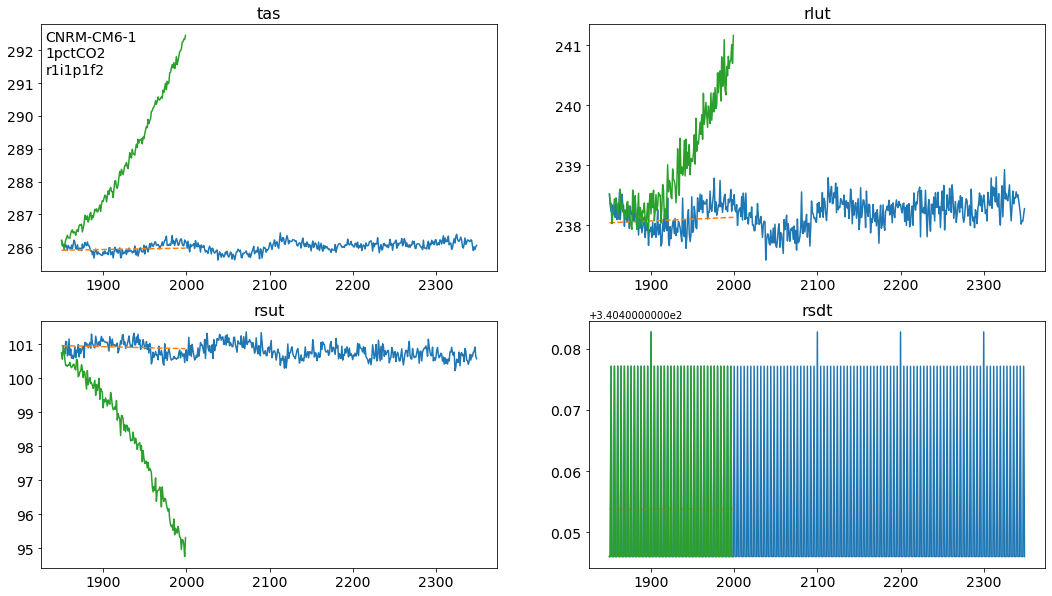

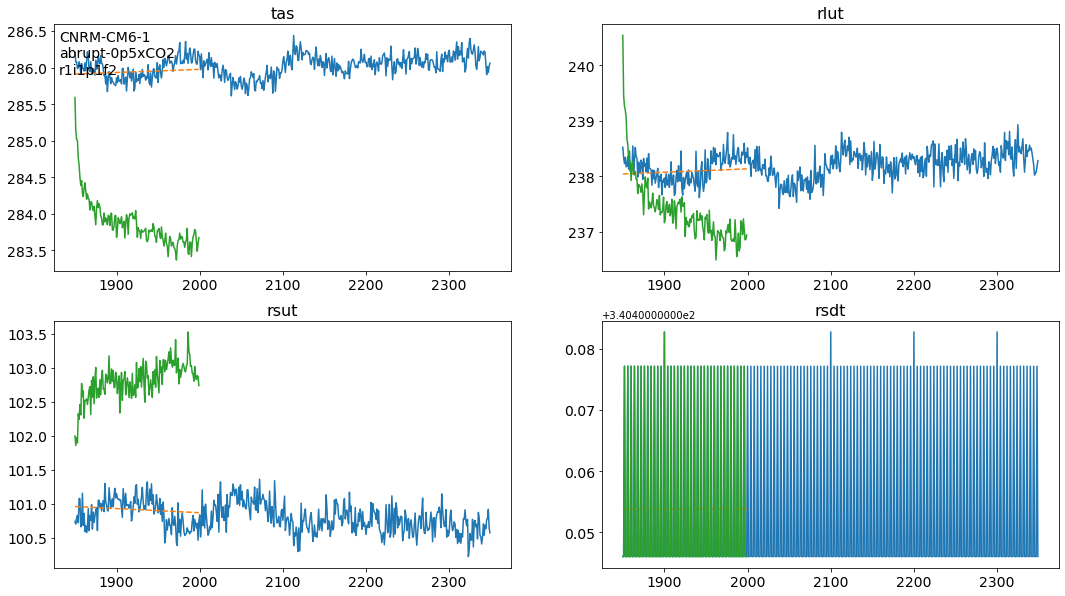

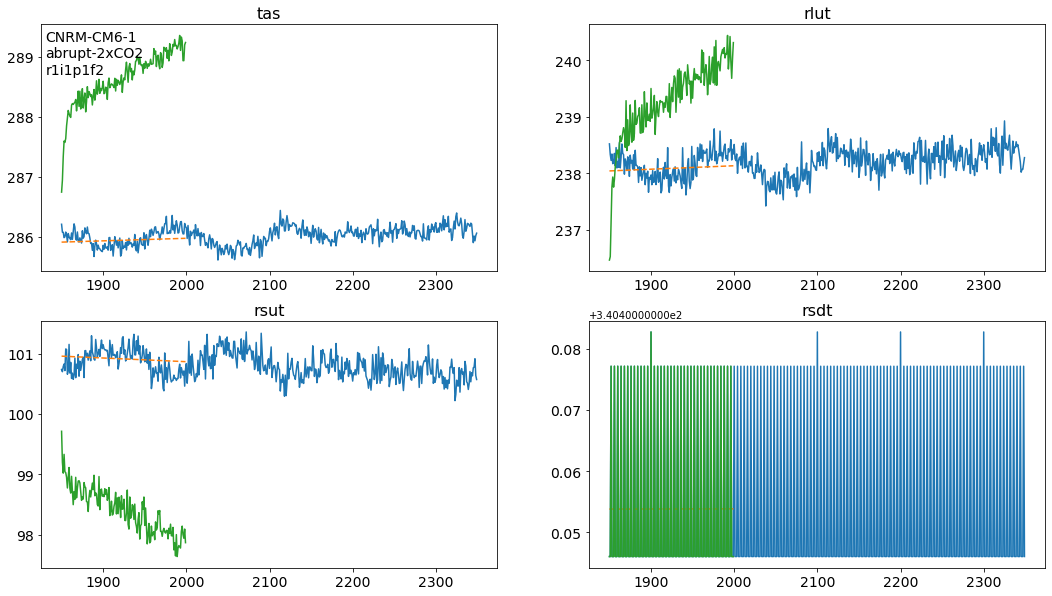

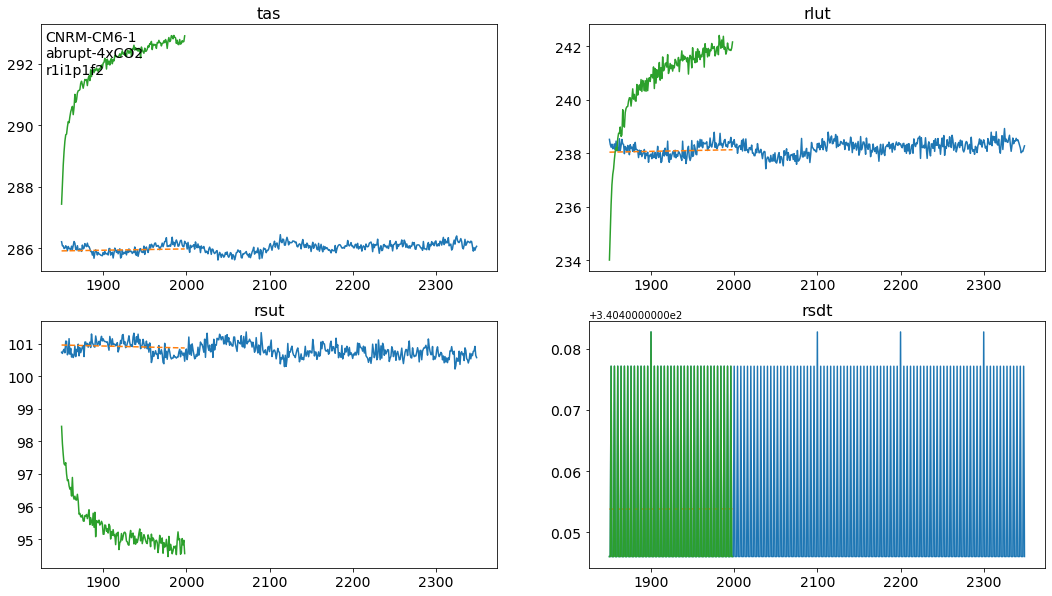

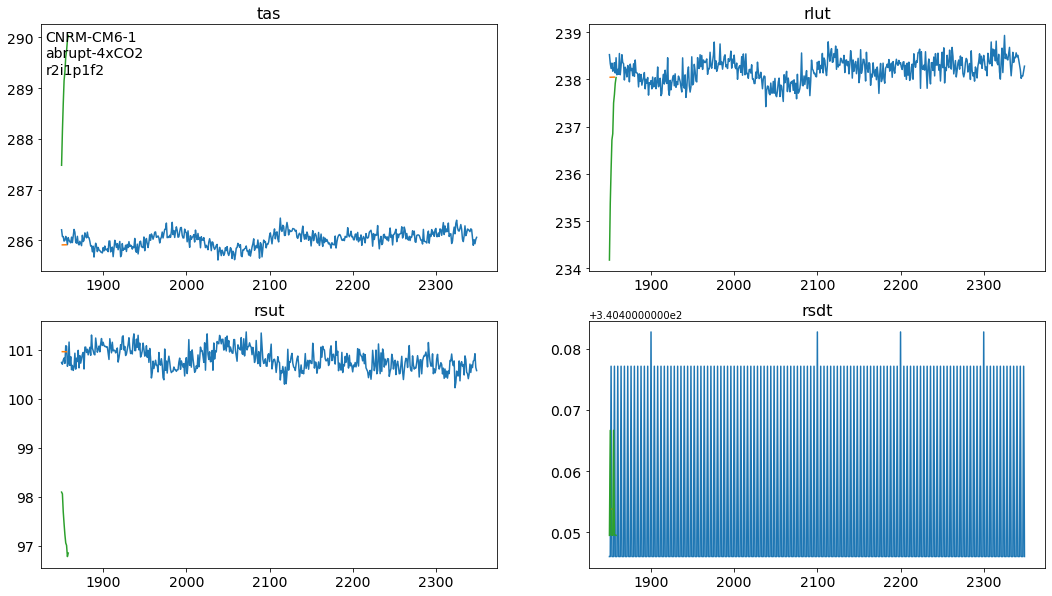

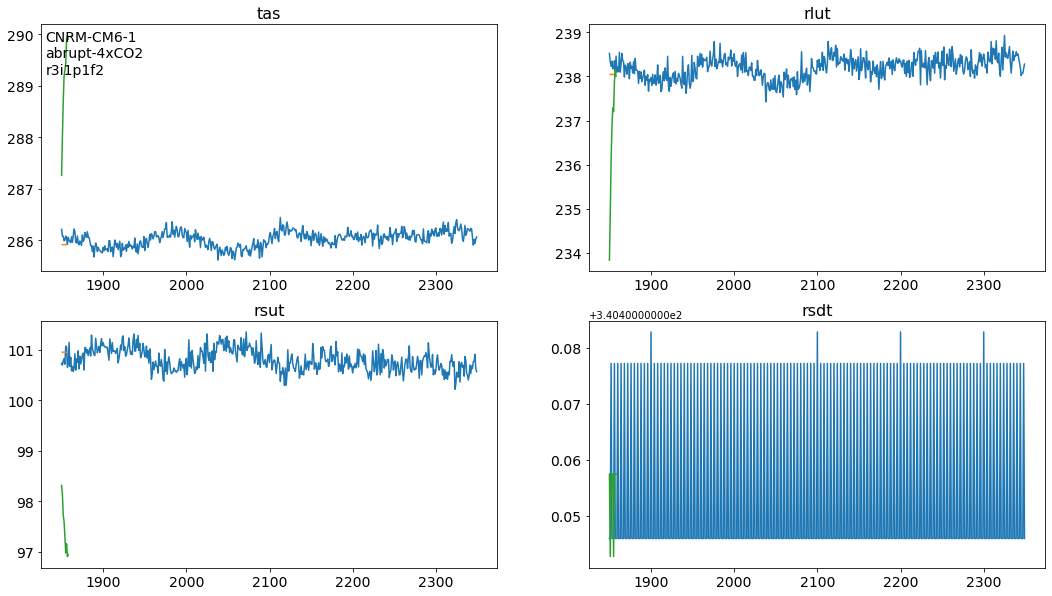

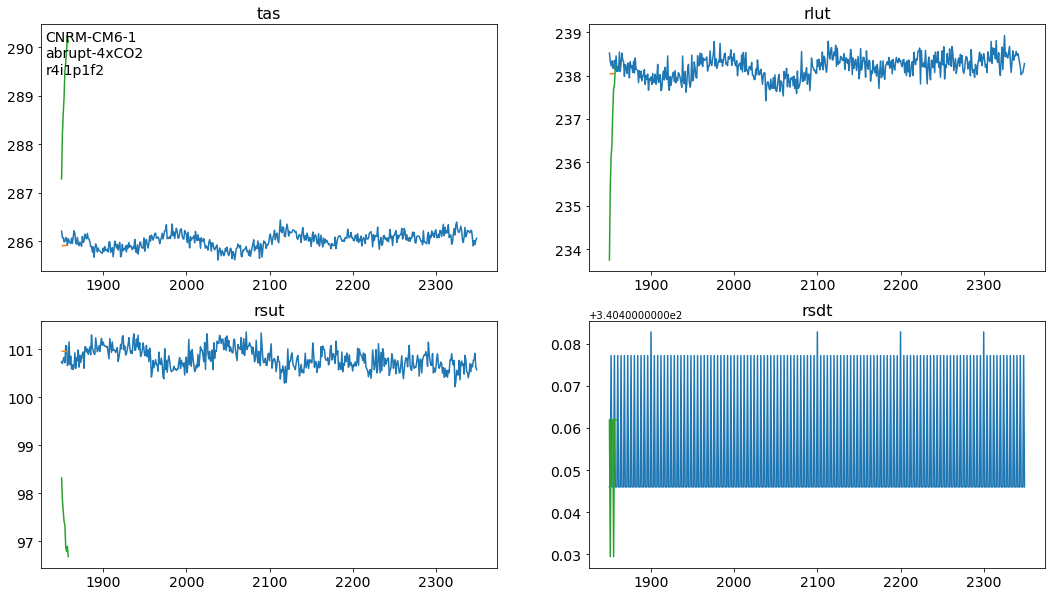

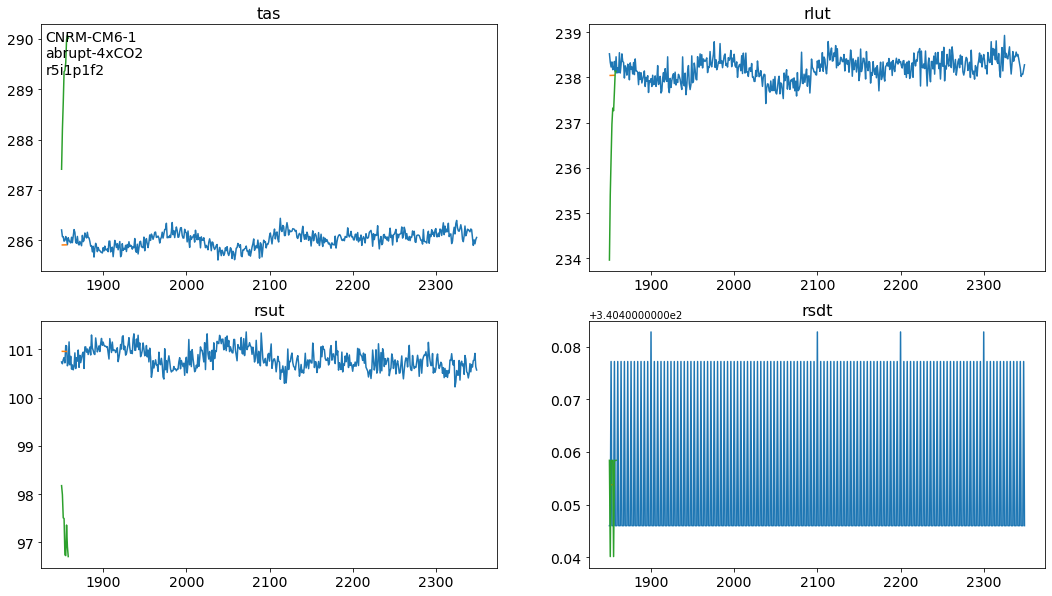

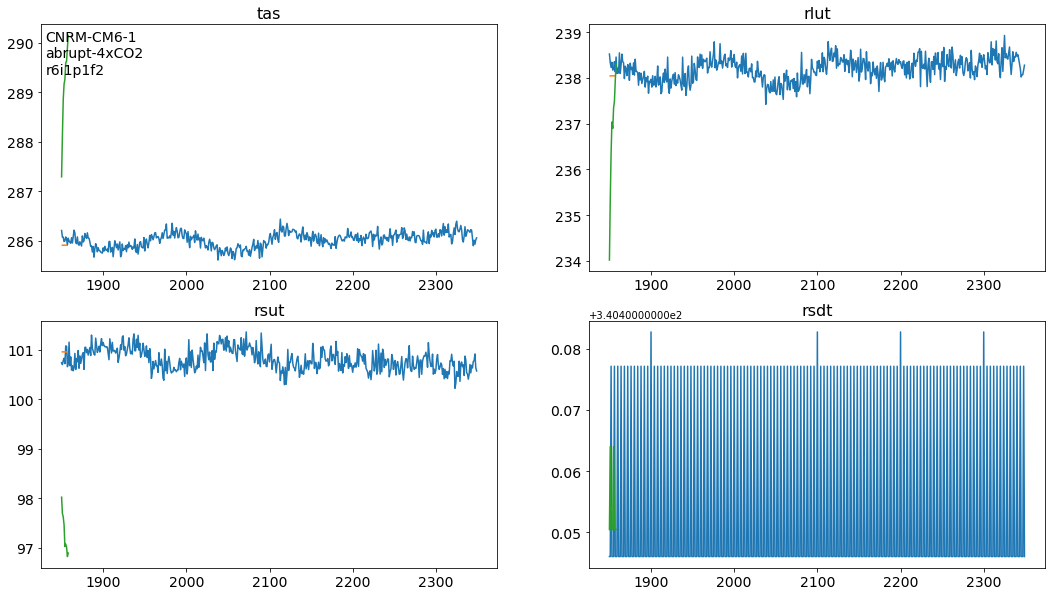

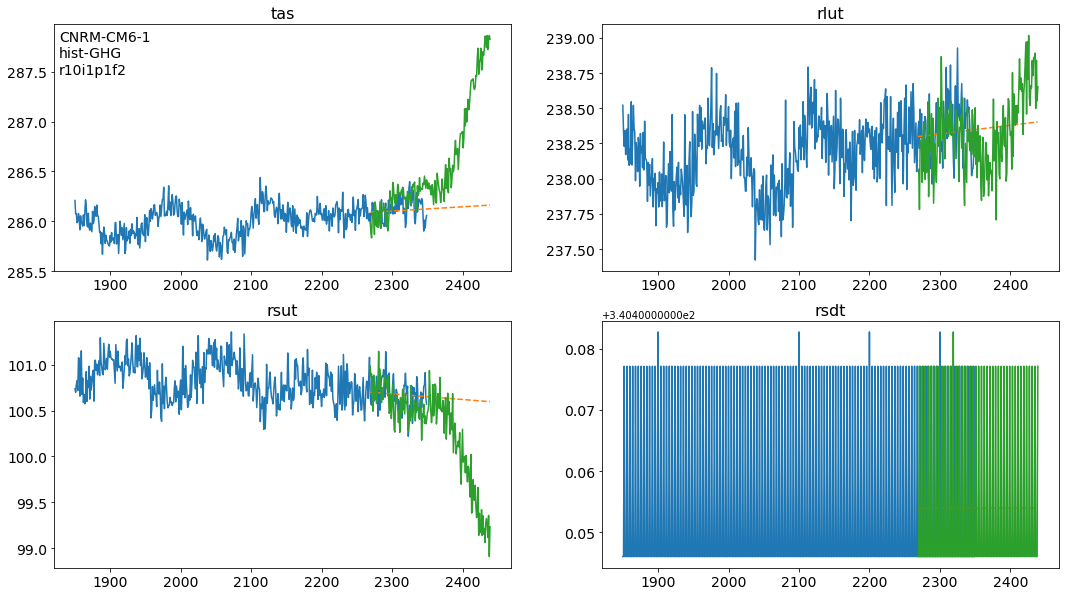

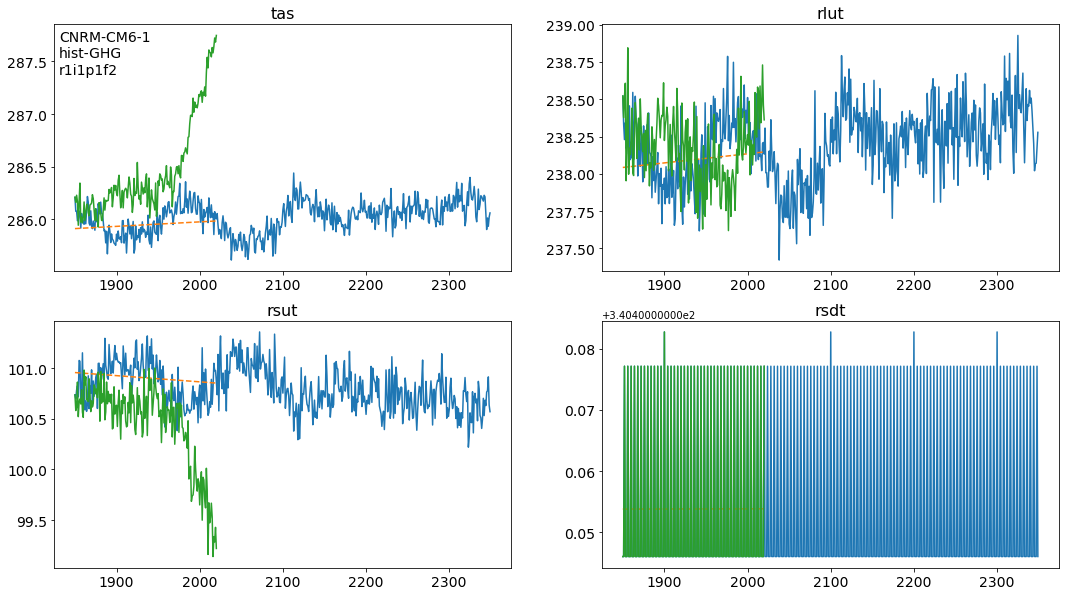

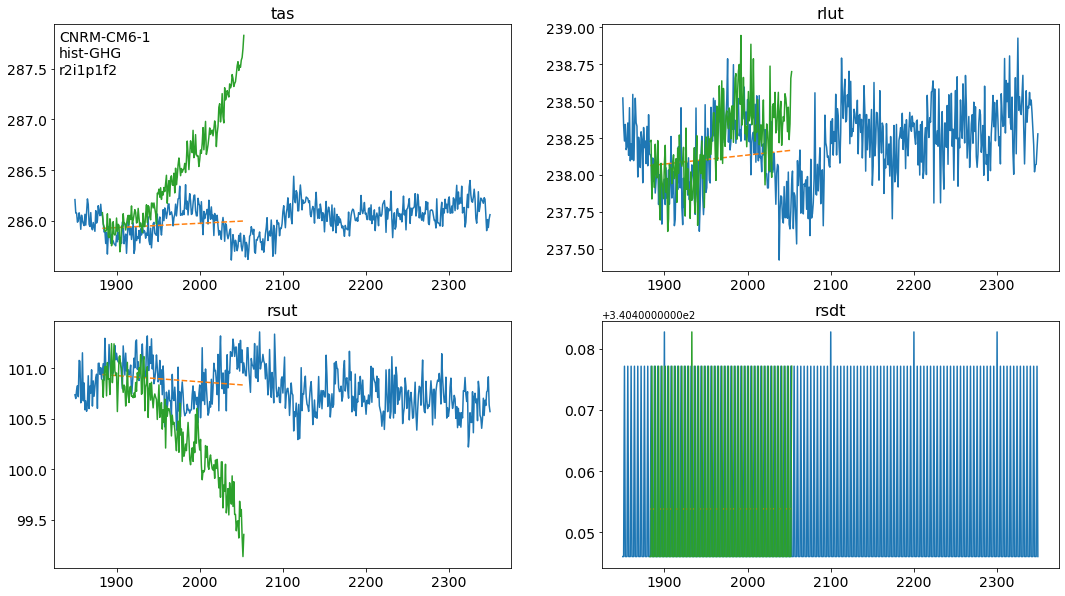

In [116]:
importlib.reload(processing_functions)
from processing_functions import *

columnames_branchinfo_overview = ['exp', 'member', 'piControl branch time (days)', 'nearest time in table (days)', 'days difference', 'piControl branch time (year)']
branchinfo_overview_df = pd.DataFrame(columns = columnames_branchinfo_overview)

piControl_path = '../Processed_data/Global_annual_means_csv/' + model + '/piControl/'
historical_path = '../Processed_data/Global_annual_means_csv/' + model + '/historical/'

# for exp in ['piControl']:
for exp in experiments:
    if exp[:6] != 'piClim': # we do not want to compute anomalies from these here
        exp_path = '../Processed_data/Global_annual_means_csv/' + model + '/' + exp + '/'

        exptable = table.loc[table['exp'] == exp]
        available_members = exptable['member'].values

        for member in available_members:
            print('\n', model, exp, member)
            member_df = exptable.loc[exptable['member'] == member]
            member_calendar = find_member_calendar(model, exp, member)

            # load exp data
            exp_filename = model + '_' + exp + '_' + member + '_means.csv'
            exp_data = pd.read_table(exp_path + exp_filename, index_col=0, sep = ',')
            if np.isnan(exp_data).values.any():
                print('Warning: data contain NaN')
            exp_years = exp_data.index.values
            if len(str(exp_years[0]))>4:
                # then it contains info about start month too,
                # because experiment does not start in january
                exp_years = [str(yr)[:4] for yr in exp_years] # this code is not tested yet
            exp_start_year = exp_years[0]
            exp_len = len(exp_years)

            if exp == 'piControl':
                piControl_member = member
            elif exp in idealised_exp or exp in hist_exp: # branches from piControl
                branch_time_days = member_df['branch_time_in_parent'].values[0]
                piControl_member = member_df['parent_variant_id'].values[0] 
                piControl_timeunit_start_year = int(member_df['parent_time_units'].values[0][11:15]) 
            elif exp in ssp_exp: # branches from historical
                # find historical parent member 
                parent_member = member_df['parent_variant_id'].values[0]
                parent_table = table.loc[table['exp'] == 'historical']
                parent_df = parent_table.loc[parent_table['member'] == parent_member]
                piControl_timeunit_start_year = int(parent_df['parent_time_units'].values[0][11:15])

                # find first year of historical parent (usually 1850)
                historical_parent_filename = model + '_historical_' + parent_member + '_means.csv'
                historical_parent_data = pd.read_table(historical_path + historical_parent_filename, index_col=0, sep = ',')
                first_year_historical_parent = historical_parent_data.index.values[0]
                # check branch for historical parent only
                branch_time_days = parent_df['branch_time_in_parent'].values[0]
                piControl_member = parent_df['parent_variant_id'].values[0]

            # load piControl values. 
            piControl_filename = model + '_piControl_' + piControl_member + '_means.csv'
            piControl_data = pd.read_table(piControl_path + piControl_filename, index_col=0, sep = ',')
            if np.isnan(piControl_data).values.any():
                print('Warning: piControl data contain NaN')
            piControl_years = piControl_data.index.values
            piControl_start_year = piControl_years[0]

            if exp == 'piControl':
                corr_piControl_years = piControl_years
            else:
                print('piControl_start_year', piControl_start_year)
                print('piControl_timeunit_start_year', piControl_timeunit_start_year)
                piControl_start_diff = piControl_start_year - piControl_timeunit_start_year
                if piControl_start_year != piControl_timeunit_start_year:
                    print('Note: piControl starts', piControl_start_diff, 'years after its time unit starts')
                    #piControl_timeunit_start_year = piControl_timeunit_correction(model, exp, member, piControl_timeunit_start_year, piControl_start_year)

                days_table = np.append([0],np.cumsum(dpy(piControl_timeunit_start_year,piControl_timeunit_start_year+1500, member_calendar)))    
                # find index of element closest to branch_time_days:
                years_since_piControl_timeunit_start = (np.abs(days_table - branch_time_days)).argmin()
                years_since_piControl_start = years_since_piControl_timeunit_start - piControl_start_diff

                print('years_since_piControl_start = ', years_since_piControl_start)
                #print('branch_time_days', branch_time_days)
                #print('nearest_time_in_table', days_table[years_since_piControl_start])
                #print('days difference:', days_table[years_since_piControl_timeunit_start] - branch_time_days)
                #print('differences not equal to 0 indicate wrong calendar assumptions or branch dates not equal to the start of a new year')

                years_since_piControl_start = branch_time_correction(model, exp, member, branch_time_days, piControl_timeunit_start_year, piControl_start_year, years_since_piControl_start)
                # write function to correct this for some models

                #piControl_branch_year = piControl_years[0] - 1 + years_since_piControl_start
                piControl_branch_year = piControl_start_year + years_since_piControl_start
                #piControl_branch_year = piControl_timeunit_start_year - 1 + years_since_piControl_start

                # collect info in overview table:
                exp_branchinfo_df = pd.DataFrame([[exp, member, branch_time_days, days_table[years_since_piControl_timeunit_start], days_table[years_since_piControl_timeunit_start] - branch_time_days, piControl_branch_year]], columns = columnames_branchinfo_overview)
                branchinfo_overview_df = pd.concat([branchinfo_overview_df, exp_branchinfo_df], ignore_index = True)

                if exp in idealised_exp or exp in hist_exp:
                    corr_piControl_years = piControl_branch_year + np.arange(exp_len) 
                elif exp in ssp_exp:
                    years_since_piControl_branch = exp_years - first_year_historical_parent
                    corr_piControl_years = piControl_branch_year + years_since_piControl_branch #np.arange(165,251)

            # Anomalies and piControl_linfit should have the same size and time index as exp_data
            # therefore we just copy, and then overwrite the values
            anomalies = exp_data.copy(deep=True)
            piControl_linfit = exp_data.copy(deep=True)
            for var in var_list:
                # make linear fit to all piControl years
                p1 = np.polyfit(piControl_years, piControl_data[var], 1)

                # make linear fit
                if set(corr_piControl_years).issubset(set(piControl_years)):
                    # then all corr_piControl_years are available
                    piControl_linfit[var] = np.polyval(p1,corr_piControl_years)
                else:
                    # extend the linear fit outside the range of the original piControl years
                    corr_piControl_years_ = list(set(corr_piControl_years).union(set(piControl_years)))
                    piControl_linfit[var] = np.polyval(p1,corr_piControl_years)

                anomalies[var] = exp_data[var] - piControl_linfit[var]

            plot_all_absolute_values(exp_data, piControl_linfit, corr_piControl_years,\
                                     piControl_data, text_str = model + '\n' + exp + '\n' + member)
            #plot_anomalies(anomalies)
            #save_anomalies(anomalies, model, exp, member)


## Check that the findings in the table below look reasonable, or if there may be branch info errors:

In [ ]:
print('piControl_start_year =',piControl_start_year)
print('piControl_timeunit_start_year =',piControl_timeunit_start_year)
branchinfo_overview_df

In [ ]:
# compare with model metadata branch info
table